In [18]:
#import dependencies 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

### Data Collection and analysis



In [19]:
#load the dataset
diabetes_df = pd.read_csv("diabetes.csv")
display(diabetes_df.head())
diabetes_df.shape


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)

In [20]:
#check for null values
diabetes_df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
#get statistical measures of the dataframe
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0 --> Non-Diabetic

1 --> Diabetic

In [22]:
#group the dataset based on the label
diabetes_df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#### Using Support Vector Machine (SVM) to build a model 

In [44]:
#split the data into explanatory and target values
X = diabetes_df.drop(columns = "Outcome", axis = 1)
y = diabetes_df["Outcome"]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [46]:
#Split the data intp trainig and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify = y, random_state = 200)

#Standardize the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Train the model


In [47]:
classifier = svm.SVC(kernel = "linear")
#fit the support vector machine classifier to the training data
classifier.fit(X_train_scaled, y_train)


SVC(kernel='linear')

#### Model Evaluation


In [49]:
# accuracy score on test data 
X_test_predict = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, X_test_predict)
print(f"accuracy of the test data: {accuracy}")

accuracy of the test data: 0.7987012987012987


#### Make A predicitive System

In [50]:
#dummy input data
input_data = (4,110,92,0,0,37.6,0.191,30)
input_data = np.asarray(input_data)

#reshape the data
input_data_reshaped = input_data.reshape(1, -1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
std_data

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[0]
The person is not diabetic


c:\Users\josep\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Using Logistic Regression to build a model

In [52]:
#initialize the model
logit = LogisticRegression()
#fit the logistic regression model to our data
logit.fit(X_train_scaled, y_train)



LogisticRegression()

#### Model Evaluation

In [53]:
#calculate the accuracy on test data
prediction = logit.predict(X_test_scaled)
#calculate the accuracy score
accuracy = accuracy_score(y_test, prediction)
print(f"accuracy on the test data: {accuracy}")


accuracy on the test data: 0.7987012987012987


##### Based on the accuracy score the logistic regression model and the SVM model perform similarly suggedting both models can be used in predicting whether a patient is likely to be diabetic or not

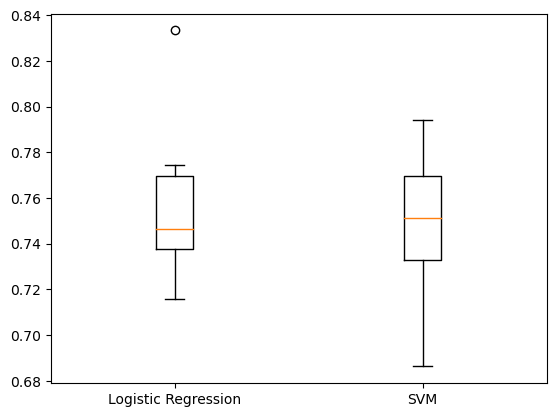

In [54]:
models = {"Logistic Regression": LogisticRegression(), "SVM": svm.SVC()}
results = []
for model in models.values():
    kf = KFold(n_splits = 6, shuffle= True, random_state= 42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv = kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()


    

##### From the above Boxplot the median score of both models is almost similar therefore the models perform similarly well.

#### Evaluate the test set


In [55]:
for name, model in models.items():
    model.fit(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} Test accuracy: {test_score}")


Logistic Regression Test accuracy: 0.7987012987012987
SVM Test accuracy: 0.7727272727272727
